In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score,KFold
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,ReLU,LeakyReLU,ELU,PReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.math import confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import cv2
import warnings
warnings.filterwarnings('ignore')
import random
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_path="/content/drive/MyDrive/train_c"

In [ ]:
test_path="/content/drive/MyDrive/test_c"

In [ ]:
all_paths_train = []  # Creating an empty list to collect all the file paths
all_labels_train = []  # Creating an empty list to collect all the labels
all_shapes_train = []  # Creating an empty list to collect all the shapes

folders = os.listdir(train_path)  # Collecting all the list of the folders corresponding to Labels

for folder in folders:
    folder_path = os.path.join(train_path, folder)
    file_list = os.listdir(folder_path)

    for file in file_list:
        file_path = os.path.join(folder_path, file)
        all_paths_train.append(file_path)
        all_labels_train.append(folder)

        # Read the image and get its shape
        img = mpimg.imread(file_path)
        shape = img.shape
        all_shapes_train.append(shape)  # Append the shape to the list of shapes


In [ ]:
folders

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
folder_path

'/content/drive/MyDrive/train_c/Viral Pneumonia'

In [ ]:
file_path

'/content/drive/MyDrive/train_c/Viral Pneumonia/06.jpeg'

In [ ]:
# Concatenate data paths with labels into one dataframe
import pandas as pd

# Create Series for file paths, labels, and shapes
file_path_series_train = pd.Series(all_paths_train, name='File_paths')
labels_series_train = pd.Series(all_labels_train, name='Classes')
shape_series_train = pd.Series(all_shapes_train, name='Shape')

# Concatenate the Series into a DataFrame
train_df = pd.concat([file_path_series_train, labels_series_train, shape_series_train], axis=1)


In [ ]:
train_df

,File_paths,Classes,Shape
0,/content/drive/MyDrive/train_c/Covid/015.jpg,Covid,"(2840, 2972, 3)"
1,/content/drive/MyDrive/train_c/Covid/02.jpeg,Covid,"(3480, 4248, 3)"
2,/content/drive/MyDrive/train_c/Covid/012.jpeg,Covid,"(2048, 2500, 3)"
3,/content/drive/MyDrive/train_c/Covid/010.png,Covid,"(1303, 1458, 4)"
4,/content/drive/MyDrive/train_c/Covid/01.jpeg,Covid,"(3480, 4248, 3)"
...,...,...,...
246,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(792, 1352, 3)"
247,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(925, 1190, 3)"
248,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(936, 1350, 3)"
249,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(840, 1064, 3)"


In [ ]:
#code for collecting all the file paths along with their corresponding labels
all_paths_test = []  # Creating an empty list to collect all the file paths
all_labels_test = []  # Creating an empty list to collect all the labels
all_shapes_test = []  # Creating an empty list to collect all the shapes

folders = os.listdir(test_path)  # Collecting all the list of the folders corresponding to Labels

for folder in folders:
    folder_path = os.path.join(test_path, folder)
    file_list = os.listdir(folder_path)

    for file in file_list:
        file_path = os.path.join(folder_path, file)
        all_paths_test.append(file_path)
        all_labels_test.append(folder)

        # Read the image and get its shape
        img = mpimg.imread(file_path)
        shape = img.shape
        all_shapes_test.append(shape)  # Append the shape to the list of shapes

In [ ]:
file_path_series_test=pd.Series(all_paths_test,name='File_paths')
labels_series_test=pd.Series(all_labels_test,name='Classes')
shape_series_test=pd.Series(all_shapes_test,name='Shape')
test_df=pd.concat([file_path_series_test,labels_series_test,shape_series_test],axis=1)

In [ ]:
test_df

,File_paths,Classes,Shape
0,/content/drive/MyDrive/test_c/Covid/0100.jpeg,Covid,"(659, 651, 3)"
1,/content/drive/MyDrive/test_c/Covid/0106.jpeg,Covid,"(876, 882, 3)"
2,/content/drive/MyDrive/test_c/Covid/auntminnie...,Covid,"(400, 523, 3)"
3,/content/drive/MyDrive/test_c/Covid/0118.jpeg,Covid,"(842, 1024, 3)"
4,/content/drive/MyDrive/test_c/Covid/096.png,Covid,"(362, 445, 4)"
...,...,...,...
61,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(813, 1272, 3)"
62,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(832, 1152, 3)"
63,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(720, 1410, 3)"
64,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(640, 1208, 3)"


In [ ]:
train_df.shape

(251, 3)

In [ ]:
test_df.shape

(66, 3)

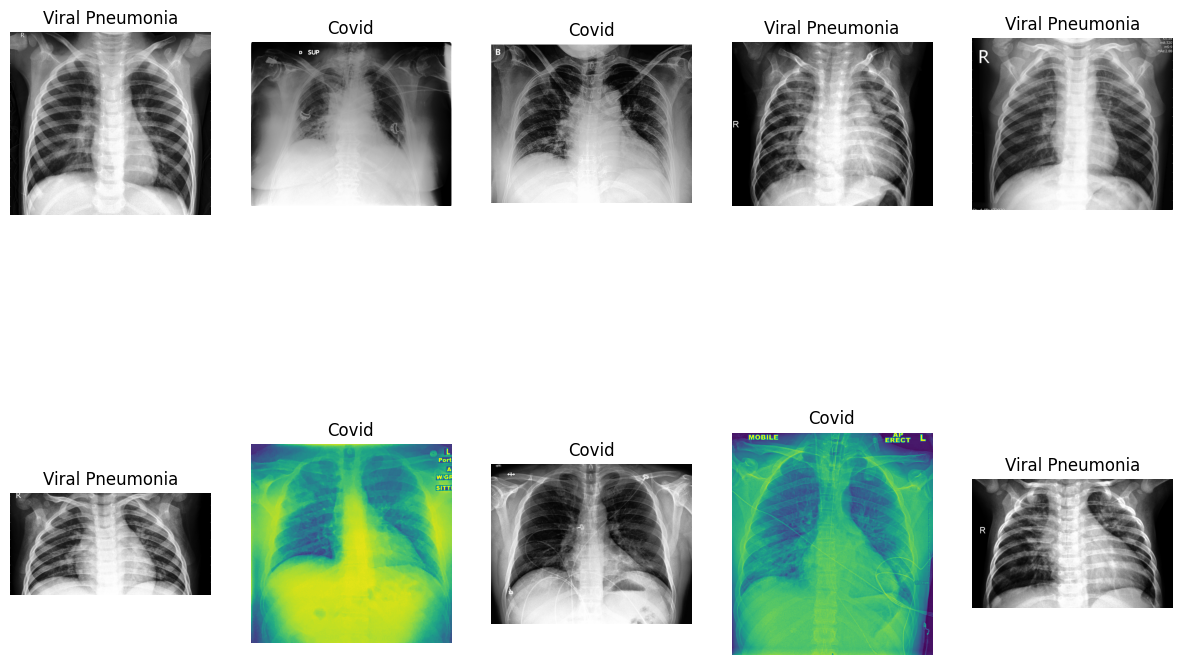

In [ ]:
#Plotting the 10 random images
random_indices = random.sample(range(len(all_paths_train)), 10)
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    img = mpimg.imread(all_paths_train[idx])
    plt.imshow(img)
    plt.title(all_labels_train[idx])
    plt.axis('off')

plt.show()

In [ ]:
resized_image_list_train = []  # Create an empty list to store the resized images
all_paths = []  # Create an empty list to store the paths of images
refactor_size = 128  # Threshold the image size

# Iterate through all the file paths
for path in all_paths_train:  # Assuming all_paths_train contains the file paths
    # Load and resize the image
    img = tf.keras.utils.load_img(path, target_size=(refactor_size, refactor_size))
    # Convert the image to array
    img_arr = tf.keras.utils.img_to_array(img)
    # Append the resized image to the list
    resized_image_list_train.append(img_arr)
    # Append the path of the image
    all_paths.append(path)

# Convert the list of resized images to numpy array
resized_image_list_train = np.asarray(resized_image_list_train)

In [ ]:
resized_image_path=pd.Series(all_paths,name='Resize image path')

In [ ]:
train_df=pd.concat([resized_image_path,file_path_series_train, labels_series_train, shape_series_train],axis=1)

In [ ]:
train_df

,Resize image path,File_paths,Classes,Shape
0,/content/drive/MyDrive/train_c/Covid/015.jpg,/content/drive/MyDrive/train_c/Covid/015.jpg,Covid,"(2840, 2972, 3)"
1,/content/drive/MyDrive/train_c/Covid/02.jpeg,/content/drive/MyDrive/train_c/Covid/02.jpeg,Covid,"(3480, 4248, 3)"
2,/content/drive/MyDrive/train_c/Covid/012.jpeg,/content/drive/MyDrive/train_c/Covid/012.jpeg,Covid,"(2048, 2500, 3)"
3,/content/drive/MyDrive/train_c/Covid/010.png,/content/drive/MyDrive/train_c/Covid/010.png,Covid,"(1303, 1458, 4)"
4,/content/drive/MyDrive/train_c/Covid/01.jpeg,/content/drive/MyDrive/train_c/Covid/01.jpeg,Covid,"(3480, 4248, 3)"
...,...,...,...,...
246,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(792, 1352, 3)"
247,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(925, 1190, 3)"
248,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(936, 1350, 3)"
249,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(840, 1064, 3)"


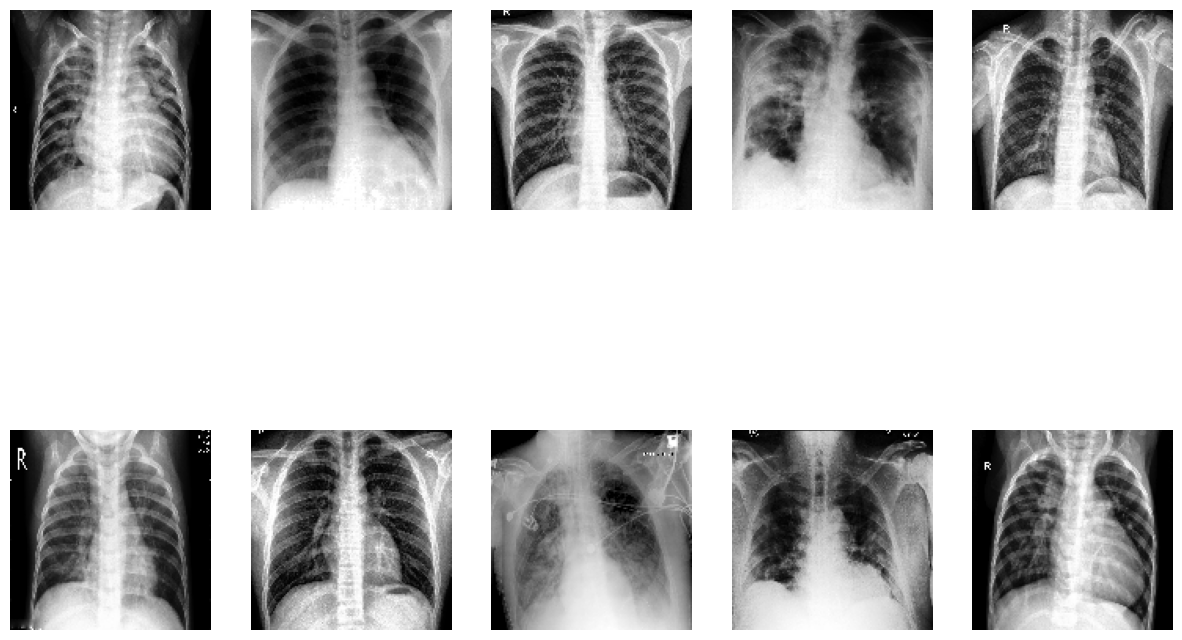

In [ ]:
# Define the number of random images to plot
num_images_to_plot = 10

# Randomly select 10 indices
random_indices = random.sample(range(len(resized_image_list_train)), num_images_to_plot)

# Plot the images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    img = resized_image_list_train[idx].astype(int)  # Convert the image array to int for plotting
    plt.imshow(img)
    plt.axis('off')

plt.show()

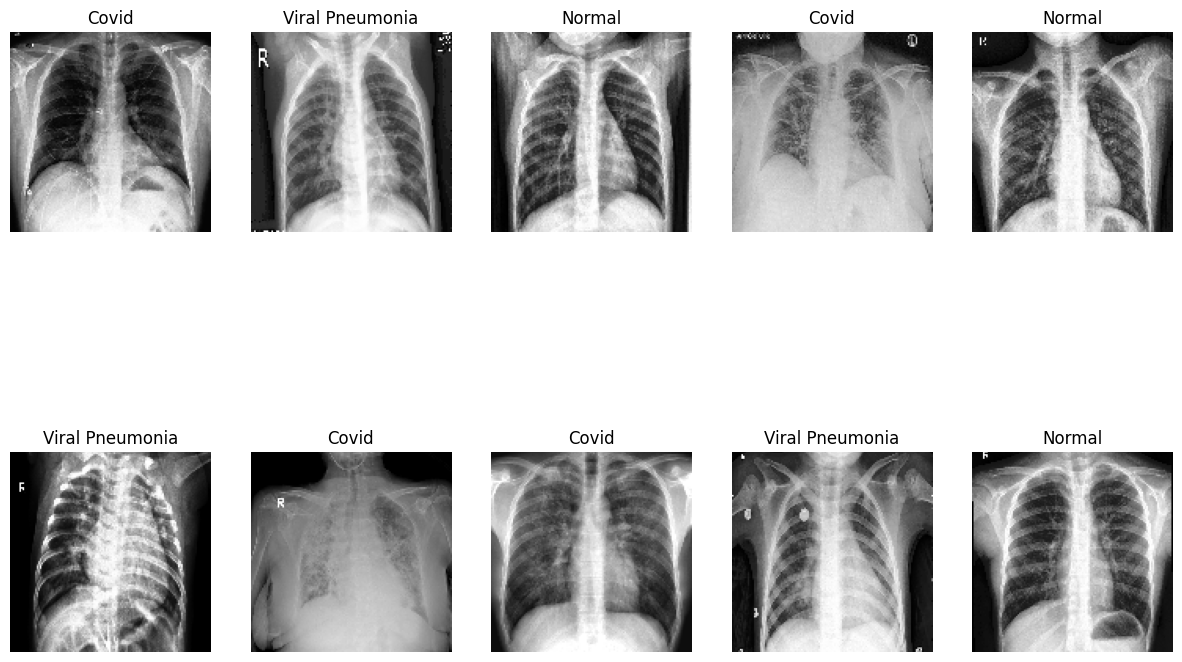

In [ ]:
# Define the number of random images to plot
num_images_to_plot = 10

# Randomly select 10 indices
random_indices = random.sample(range(len(resized_image_list_train)), num_images_to_plot)

# Plot the images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    img = resized_image_list_train[idx].astype(int)  # Convert the image array to int for plotting
    plt.imshow(img)
    plt.title(all_labels_train[idx])  # Add the corresponding label as title
    plt.axis('off')

plt.show()

In [ ]:
train_df

,Resize image path,File_paths,Classes,Shape
0,/content/drive/MyDrive/train_c/Covid/015.jpg,/content/drive/MyDrive/train_c/Covid/015.jpg,Covid,"(2840, 2972, 3)"
1,/content/drive/MyDrive/train_c/Covid/02.jpeg,/content/drive/MyDrive/train_c/Covid/02.jpeg,Covid,"(3480, 4248, 3)"
2,/content/drive/MyDrive/train_c/Covid/012.jpeg,/content/drive/MyDrive/train_c/Covid/012.jpeg,Covid,"(2048, 2500, 3)"
3,/content/drive/MyDrive/train_c/Covid/010.png,/content/drive/MyDrive/train_c/Covid/010.png,Covid,"(1303, 1458, 4)"
4,/content/drive/MyDrive/train_c/Covid/01.jpeg,/content/drive/MyDrive/train_c/Covid/01.jpeg,Covid,"(3480, 4248, 3)"
...,...,...,...,...
246,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(792, 1352, 3)"
247,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(925, 1190, 3)"
248,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(936, 1350, 3)"
249,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(840, 1064, 3)"


In [ ]:
resized_image_list_test = []  # Create an empty list to store the resized images
all_paths = []  # Create an empty list to store the paths of images
refactor_size = 128  # Threshold the image size

# Iterate through all the file paths
for path in all_paths_test:  # Assuming all_paths_train contains the file paths
    # Load and resize the image
    img = tf.keras.utils.load_img(path, target_size=(refactor_size, refactor_size))
    # Convert the image to array
    img_arr = tf.keras.utils.img_to_array(img)
    # Append the resized image to the list
    resized_image_list_test.append(img_arr)
    # Append the path of the image
    all_paths.append(path)

# Convert the list of resized images to numpy array
resized_image_list_test = np.asarray(resized_image_list_test)

In [ ]:
resized_image_path_test=pd.Series(all_paths,name='Resize image path')

In [ ]:
test_df=pd.concat([resized_image_path_test,file_path_series_test, labels_series_test, shape_series_test],axis=1)

In [ ]:
test_df

,Resize image path,File_paths,Classes,Shape
0,/content/drive/MyDrive/test_c/Covid/0100.jpeg,/content/drive/MyDrive/test_c/Covid/0100.jpeg,Covid,"(659, 651, 3)"
1,/content/drive/MyDrive/test_c/Covid/0106.jpeg,/content/drive/MyDrive/test_c/Covid/0106.jpeg,Covid,"(876, 882, 3)"
2,/content/drive/MyDrive/test_c/Covid/auntminnie...,/content/drive/MyDrive/test_c/Covid/auntminnie...,Covid,"(400, 523, 3)"
3,/content/drive/MyDrive/test_c/Covid/0118.jpeg,/content/drive/MyDrive/test_c/Covid/0118.jpeg,Covid,"(842, 1024, 3)"
4,/content/drive/MyDrive/test_c/Covid/096.png,/content/drive/MyDrive/test_c/Covid/096.png,Covid,"(362, 445, 4)"
...,...,...,...,...
61,/content/drive/MyDrive/test_c/Viral Pneumonia/...,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(813, 1272, 3)"
62,/content/drive/MyDrive/test_c/Viral Pneumonia/...,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(832, 1152, 3)"
63,/content/drive/MyDrive/test_c/Viral Pneumonia/...,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(720, 1410, 3)"
64,/content/drive/MyDrive/test_c/Viral Pneumonia/...,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(640, 1208, 3)"


In [ ]:
#Image Augmentation.
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.30),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2),
])

augmented_images_train = data_augmentation(resized_image_list_train)

In [ ]:
augmented_images_train.shape

TensorShape([251, 128, 128, 3])

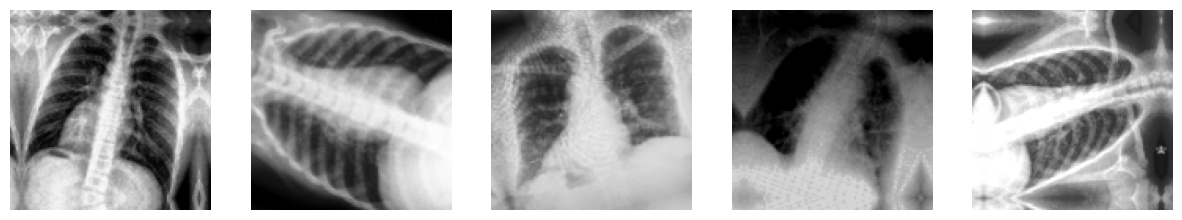

In [ ]:
num_images_to_plot = 5

# Randomly select 5 indices
random_indices = random.sample(range(len(resized_image_list_train)), num_images_to_plot)

# Plot the augmented images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(1, 5, i)
    augmented_img = data_augmentation(tf.expand_dims(resized_image_list_train[idx], axis=0))
    plt.imshow(tf.squeeze(augmented_img, axis=0).numpy().astype(int))
    plt.axis('off')

plt.show()

In [ ]:
#Image Augmentation.
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.30),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2),
])

augmented_images_test = data_augmentation(resized_image_list_test)

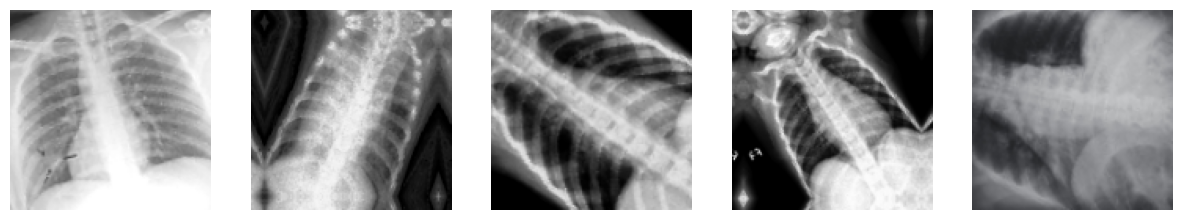

In [ ]:
num_images_to_plot = 5

# Randomly select 5 indices
random_indices = random.sample(range(len(resized_image_list_test)), num_images_to_plot)

# Plot the augmented images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(1, 5, i)
    augmented_img = data_augmentation(tf.expand_dims(resized_image_list_test[idx], axis=0))
    plt.imshow(tf.squeeze(augmented_img, axis=0).numpy().astype(int))
    plt.axis('off')

plt.show()

In [ ]:
# Define a Sequential model
model = models.Sequential([

    # Input layer: Expects input images of shape (128, 128, 3)
    tf.keras.Input(shape=(128, 128, 3)),

    # Data Augmentation layer for image preprocessing
    data_augmentation,

    # Convolutional layer with 32 filters and a 3x3 kernel, using ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu'),

    # MaxPooling layer to reduce spatial dimensions by taking the maximum value in a 2x2 window
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer with 64 filters and a 3x3 kernel, using ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),

    # MaxPooling layer to further reduce spatial dimensions
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional layer with 128 filters and a 3x3 kernel, using ReLU activation
    layers.Conv2D(128, (3, 3), activation='relu'),

    # MaxPooling layer to further reduce spatial dimensions
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer to convert the 3D feature maps to a 1D vector
    layers.Flatten(),

    # Fully connected Dense layer with 128 neurons and sigmoid activation
    layers.Dense(128, activation='relu'),

    # Output layer with 5 neurons (assuming 5 classes) and softmax activation for multi-class classification
    layers.Dense(5, activation='sigmoid')
])

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_df

In [ ]:
label_encoder = LabelEncoder()

# Fit and transform the string labels to numeric labels
train_df['numeric_labels'] = label_encoder.fit_transform(train_df['Classes'])


In [ ]:
test_df['numeric_labels'] = label_encoder.fit_transform(test_df['Classes'])

In [ ]:
test_df

,Resize image path,File_paths,Classes,Shape,numeric_labels
0,/content/drive/MyDrive/test_c/Covid/0100.jpeg,/content/drive/MyDrive/test_c/Covid/0100.jpeg,Covid,"(659, 651, 3)",0
1,/content/drive/MyDrive/test_c/Covid/0106.jpeg,/content/drive/MyDrive/test_c/Covid/0106.jpeg,Covid,"(876, 882, 3)",0
2,/content/drive/MyDrive/test_c/Covid/auntminnie...,/content/drive/MyDrive/test_c/Covid/auntminnie...,Covid,"(400, 523, 3)",0
3,/content/drive/MyDrive/test_c/Covid/0118.jpeg,/content/drive/MyDrive/test_c/Covid/0118.jpeg,Covid,"(842, 1024, 3)",0
4,/content/drive/MyDrive/test_c/Covid/096.png,/content/drive/MyDrive/test_c/Covid/096.png,Covid,"(362, 445, 4)",0
...,...,...,...,...,...
61,/content/drive/MyDrive/test_c/Viral Pneumonia/...,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(813, 1272, 3)",2
62,/content/drive/MyDrive/test_c/Viral Pneumonia/...,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(832, 1152, 3)",2
63,/content/drive/MyDrive/test_c/Viral Pneumonia/...,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(720, 1410, 3)",2
64,/content/drive/MyDrive/test_c/Viral Pneumonia/...,/content/drive/MyDrive/test_c/Viral Pneumonia/...,Viral Pneumonia,"(640, 1208, 3)",2


In [ ]:
train_df

,Resize image path,File_paths,Classes,Shape,numeric_labels
0,/content/drive/MyDrive/train_c/Covid/015.jpg,/content/drive/MyDrive/train_c/Covid/015.jpg,Covid,"(2840, 2972, 3)",0
1,/content/drive/MyDrive/train_c/Covid/02.jpeg,/content/drive/MyDrive/train_c/Covid/02.jpeg,Covid,"(3480, 4248, 3)",0
2,/content/drive/MyDrive/train_c/Covid/012.jpeg,/content/drive/MyDrive/train_c/Covid/012.jpeg,Covid,"(2048, 2500, 3)",0
3,/content/drive/MyDrive/train_c/Covid/010.png,/content/drive/MyDrive/train_c/Covid/010.png,Covid,"(1303, 1458, 4)",0
4,/content/drive/MyDrive/train_c/Covid/01.jpeg,/content/drive/MyDrive/train_c/Covid/01.jpeg,Covid,"(3480, 4248, 3)",0
...,...,...,...,...,...
246,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(792, 1352, 3)",2
247,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(925, 1190, 3)",2
248,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(936, 1350, 3)",2
249,/content/drive/MyDrive/train_c/Viral Pneumonia...,/content/drive/MyDrive/train_c/Viral Pneumonia...,Viral Pneumonia,"(840, 1064, 3)",2


In [ ]:
x_train=augmented_images_train
y_train=train_df['numeric_labels']

In [ ]:
x_train.shape

TensorShape([251, 128, 128, 3])

In [ ]:
y_train.shape

(251,)

In [ ]:
y_train.dtype

dtype('int64')

In [ ]:
x_train.dtype

tf.float32

In [ ]:
x_test=augmented_images_test
y_test=test_df['numeric_labels']

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[checkpoint])

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 207.5924 - accuracy: 0.3506
Epoch 1: val_accuracy improved from -inf to 0.40909, saving model to best_model.h5
8/8 [==============================] - 13s 1s/step - loss: 207.5924 - accuracy: 0.3506 - val_loss: 4.3584 - val_accuracy: 0.4091
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1.8109 - accuracy: 0.4263
Epoch 2: val_accuracy improved from 0.40909 to 0.56061, saving model to best_model.h5
8/8 [==============================] - 8s 1s/step - loss: 1.8109 - accuracy: 0.4263 - val_loss: 0.9628 - val_accuracy: 0.5606
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 0.9742 - accuracy: 0.5498
Epoch 3: val_accuracy improved from 0.56061 to 0.68182, saving model to best_model.h5
8/8 [==============================] - 10s 1s/step - loss: 0.9742 - accuracy: 0.5498 - val_loss: 0.7887 - val_accuracy: 0.6818
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 0.9301 - accuracy: 

In [ ]:
from tensorflow.keras.optimizers import Adam
# Load the pre-trained VGG16 model without the top (fully connected) layers
vgg16_base = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the weights of the pre-trained layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained VGG16 model
model = tf.keras.Sequential([
    vgg16_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Output layer with 5 neurons for 5 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on your data
history = model.fit(x_train,y_train,epochs=10)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible
